# Implementing K-Means Algorithm



# Problem Discussion: 



## 1. Evaluating Model Performance

Essentially evaluating model performance is identical to finding optimal $k$ values.

Just as in the formal problem, we can use two metrics to evaluate how good our clustering is:

1. `SSE` (Sum of Squared Error):
   The smaller it is, the better our clustering is. Intuitively, it indicates that how close our datapoints are to their allocated cluster centers.

   consider a dataset $D$ containing $n$ datapoints:

   $$D = \{x_1, \cdots, x_n\}$$

   and the result of clustering is:

   $$C = \{C_1, \cdots, C_n\}$$

   Then its `SSE` is calculated using:

   $$\text{SSE}(C) = \sum_{k=1}^{K} \sum_{x_i \in C_k} \vert x_i - m_k \vert ^2$$

<br>

2. `Silhouette Coefficient`:
   The greater it is, the better our clustering is. the `Slhouette Coefficient` is essentially the **average** of each datapoint's silhouette value in the dataset. 

   for each Datapoint, the Silhoutte Value $s(i)$ is :

   $$s(i) = \frac{b(i) - a(i)}{\text{max}\{a(i), b(i)\}}$$

   if the number of points in cluster $C_i > 1$, else

   $$s(i) = 0$$

   where $a(i)$ is the measure of the **similarity of each data point $i$ in cluster $C_i$ to its own cluster**:

   $$a(i) = \frac{1}{\vert C_i\vert} \sum_{j \in C_i, ~ i \neq j}d(i, j)$$

   i.e. It's measured as the **average distance of each data point $i$ from other points in the cluster**;

   $b(i)$ is the measure of **dis-similarity of each data point $i$** from **points in other clusters**.

   $$b(i) = \min_{i \neq j} \frac{1}{\vert C_j \vert} \sum_{j \in C_j} d(i, j)$$


   where $d(i, j)$ is the **disance between point $i$ and $j$**. Commonly, we just use **Euclidean Distance**.


## 2. Determining $k$ Value

we have two ways of determining the $k$ value:

1. Using `Elbow Method`:

    1. Computing the **Within-Cluster-Sum** of **Squared Errors** (`WSS` or `SSE`) for different values of $k$
    2. Choose the $k$ value where `WSS` (`SSE`) **first begin to deminish**.

    

<br>

2. Using `Silhouette Method`:
   We use silhouette value measure **how similar a point is to its own cluster** compared to **other clusters**.

   Silhouette value rangs between $1$ and $-1$, the higher silhouette value is, the more desiable that our current clustering is, since it indicates that the point is placed in the correct cluster.

   Therefore, we can use silhouette value to determine if we have created too many or too few clusters.

Then we use some randomly-generated data to demostrate:

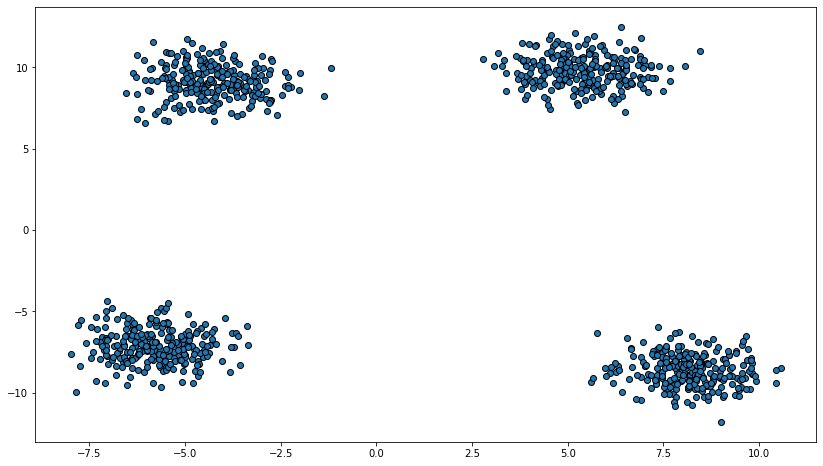

In [25]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Create dataset with 4 random cluster centers and 1000 datapoints
x, y = make_blobs(n_samples=1000, centers=4, n_features=2, shuffle=True,random_state=31)

# print out the scatter graph
plt.figure(figsize=(14, 8))
plt.scatter(x[:,0], x[:,1], edgecolor="black")


### 2.1 Using `Elbow Method` to find the most optimal $k$

In [24]:
from sklearn.cluster import KMeans

# helper returns WSS score for k values from 1 to kmax
def handleWSSCalculation(points, kmax):
    sse = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters=k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0

        # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
        for i in range(len(points)):
            curr_center = centroids[pred_clusters[i]]
            curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
        sse.append(curr_sse)
    return sse

Text(0.5, 1.0, 'Relation between k and WSS')

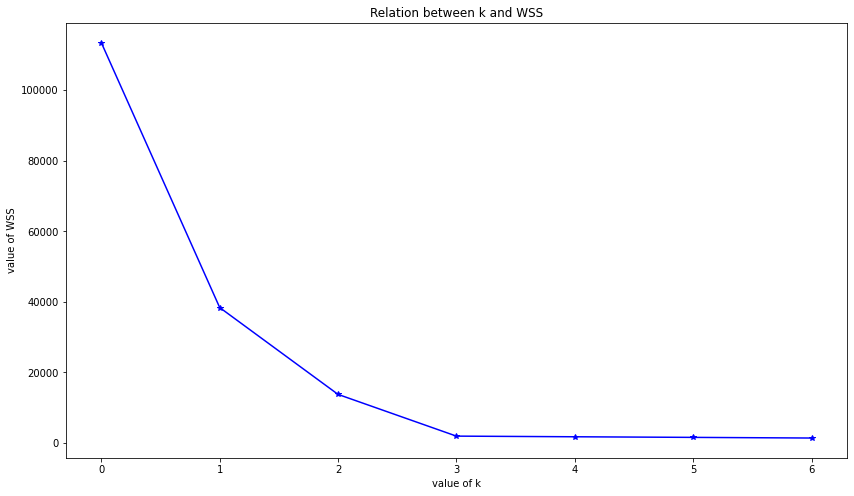

In [19]:
plt.figure(figsize=(14, 8))
plt.plot([i for i in range(7)], handleWSSCalculation(x, 7), "blue", marker="*")

plt.xlabel("value of k")
plt.ylabel("value of WSS")
plt.title("Relation between k and WSS")

From the above example, we can clearly identify that the elbow begins to diminish at $k=3$, therefore in this case we choose maximum $k$ to be $3$.

However, not all cases have a clear elbow diminish point. for example, consider the following case:

![](https://miro.medium.com/max/1400/1*t7VgOuC_Yp-Y1ND8z-eFtQ.png)

We cannot guarantee which choice should we take for Dataset B, either $k=3$ or $k=4$ seems to be legit.

Under ambiguous cases like the one we saw in Dataset B, we use **Silhouette Method**:

### 2.2 Using `Silhouette Method` to find the most optimal $k$

Text(0.5, 1.0, 'Relation between k and Silhouette score')

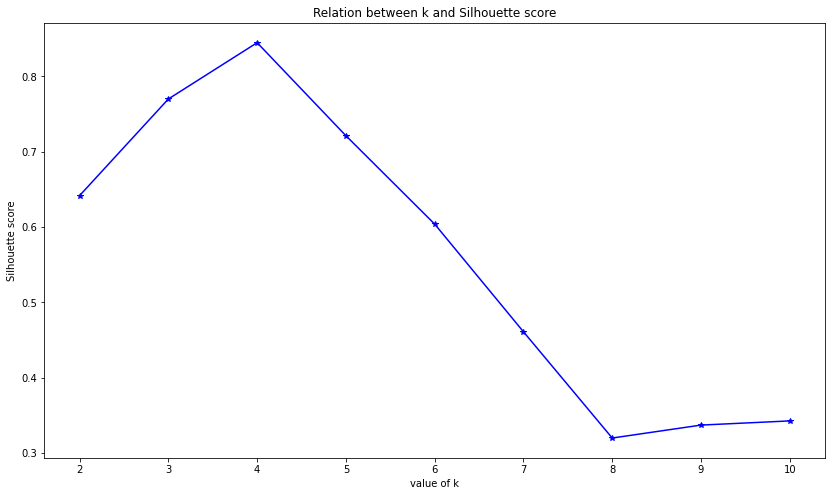

In [20]:
from sklearn.metrics import silhouette_score

silhouette = []
kmax = 10

# since dis-similarity cannot be defined for a single cluster, the minimum number of k must geq 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(x)
    labels = kmeans.labels_
    silhouette.append(silhouette_score(x, labels, metric='euclidean'))

plt.figure(figsize=(14, 8))
plt.plot([i for i in range(2, kmax+1)], silhouette, "blue", marker="*")

plt.xlabel("value of k")
plt.ylabel("Silhouette score")
plt.title("Relation between k and Silhouette score")

From the graph we can clearly identify the peak is located at $k=4$. Therefore choice $k=4$ is optimal. 

## 3. Implementation

[[-5.78323079 -7.12500533]
 [-4.29484995  9.09024205]
 [ 8.16531986 -8.6127562 ]
 [ 5.40265095  9.79447399]]
[1 0 3 2 2]


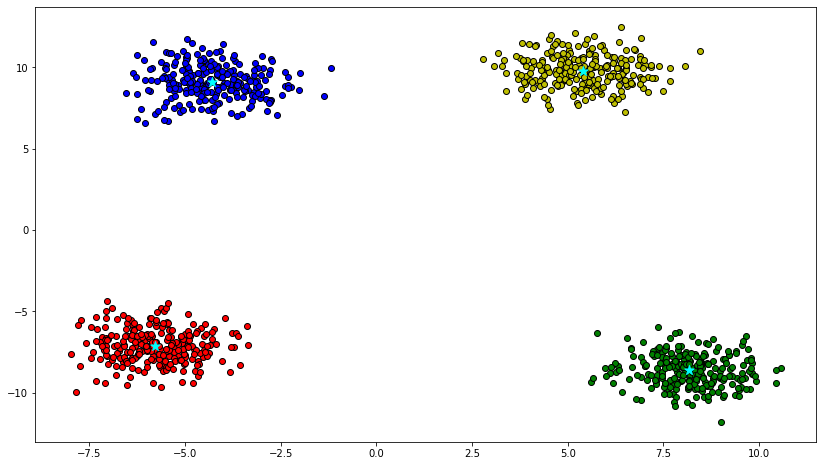

In [28]:
import numpy as np
from matplotlib import pyplot
from sklearn.cluster import KMeans

# We introduce the implementation using `sklearn` library:

# define a helper to return different color based on different cluster indexes
def getColor(index):
    if index == 0:
        res = 'r'
    elif index == 1:
        res = 'b'
    elif index == 2:
        res = 'g'
    else:
        res = 'y'
    return res


# instantiate a 
model = KMeans(n_clusters=4)

# separate the dataset into 4 clusters
model.fit(x)

# Fetch the center points of four groups of datapoints
centers = model.cluster_centers_

# retrieve each datapoint's corresponding cluster
labels = model.labels_
print(centers[0:5])
print(labels[0:5])

# print out each datapoint in our dataset
plt.figure(figsize=(14, 8))
for i in range(len(labels)):
    pyplot.scatter(x[i][0], x[i][1], c=getColor(labels[i]), edgecolors='black')

# print out the center of each clusters
pyplot.scatter(centers[:,0], centers[:,1], marker='*', s=100, color='cyan')


Then we perform predictions on new datapoints based on our current clustering result:

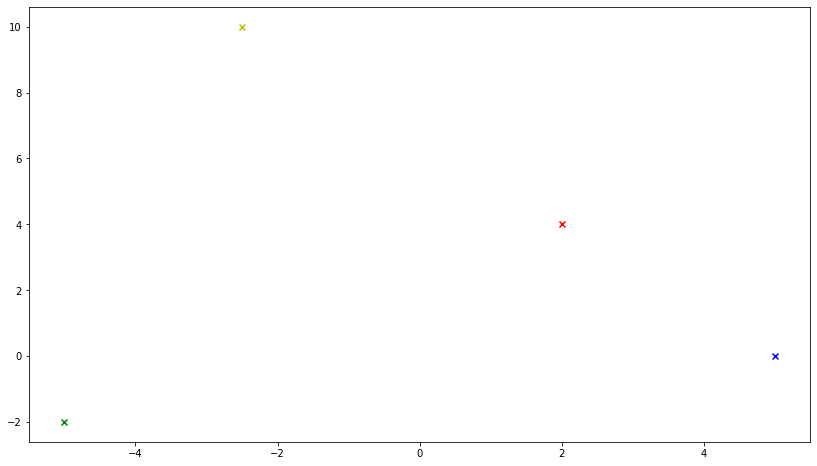

In [26]:
# new datapoints whose categories  are to be predicted
predict = [[2, 4], 
           [-2.5, 10], 
           [-5, -2],
           [5, 0]]

# retrieve the label of these points to be predicted
labels = model.predict(predict)

# print out all labelled results
plt.figure(figsize=(14, 8))
for i in range(len(labels)):
    pyplot.scatter(predict[i][0], predict[i][1], c=getColor(labels[i]), marker='x')


## 4. Improvements

### 4.1 K-Means++

Actually implemented by `sklearn.cluster.KMeans()` by default:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


![20220315171638](https://cdn.jsdelivr.net/gh/KirisameR/KirisameR.github.io/img/blogpost_images/20220315171638.png)


Basically its main idea is: make sure that initial clustering centers are as far away from each other as possible.

That is to say, it **only improves the choice on initial clustering centers**, while other parts remains the same as conventional K-Means Algorithm.

Therefore, we only need to care about **how it choose initial datapoints**:

1. **Randomly** select one datapoint as the **first clustering centroid**, denote as $c_1$.

2. Calculate **the distance between each point $x_i$ and its nearest clustering centroid**, denote it as $D(x_i)$. 

3. Assign probability to each point $x_i$ based on their $D(x_i)$: the **higher** it is, the probability that this point is going to be picked as the next clustering centroid will become **larger**.

4. Then using roulette-wheel selection to select one datapoint, take it as the new clustering centroid.

5. Go back to procedure $2$, iterate until all $k$ centroids are chosen.


Then we take an example to explain how new datapoints is chose:

![20220315192929](https://cdn.jsdelivr.net/gh/KirisameR/KirisameR.github.io/img/blogpost_images/20220315192929.png)

assume point $6$ is selected as the first clustering centroid. Then each points' $D(x)$ and their probability to be selected as the second clustering centroid is shown in the following table:

![20220315193308](https://cdn.jsdelivr.net/gh/KirisameR/KirisameR.github.io/img/blogpost_images/20220315193308.png)

Where $P(x)$ represents the probability, we use $\text{Sum}$ to select the new clustering centroid: 

if the random number we generated is $0.618$, then we know that this number falls in the interval of $[0.525, 0.65)$, therefore we choose point $3$.

### 4.2 K-Medoids

The main difference `K-Medoids Method` made is: **it changed the way of choosing clustering centroid**:

1. For conventional `K-Means Algorithm`, it picks **the geometry center to be one cluster's centroid**.

2. For `K-Medoids`, it choose **the datapoint which is the closest to the geometrical center** to be the centroid:

To update any cluster's centroid, `K-Medoids` must **iterate through each data point $x_i$ in the centroid** and calculate its "score" using an evaluate function $E(x)$, which essetially evaluate **the sum of the distance from any other points in the dataset $x_j$ to this point $x_i$**, i.e.

$$\sum_{j \neq i, ~ x_j \in C_i} d(x_i, x_j)$$

Then the datapoint with the smallest $E(x)$ will be selected to be the new centroid (medoid).

Therefore the procedure of `K-Medoids Method` is:

1. Randomly pick $k$ points to be the initial medoids.

2. Allocate the rest of the points to $k$ clusters based on their distance to each initial medoids.

3. Update each cluster's centroid (medoid) under the principle described above.

4. Repeat procedure $2, 3$ until none of the medoids has changed or exceeds maximum iteration threshold.

Text(0.5, 1.0, 'KMedoids clustering. Medoids are represented in cyan.')

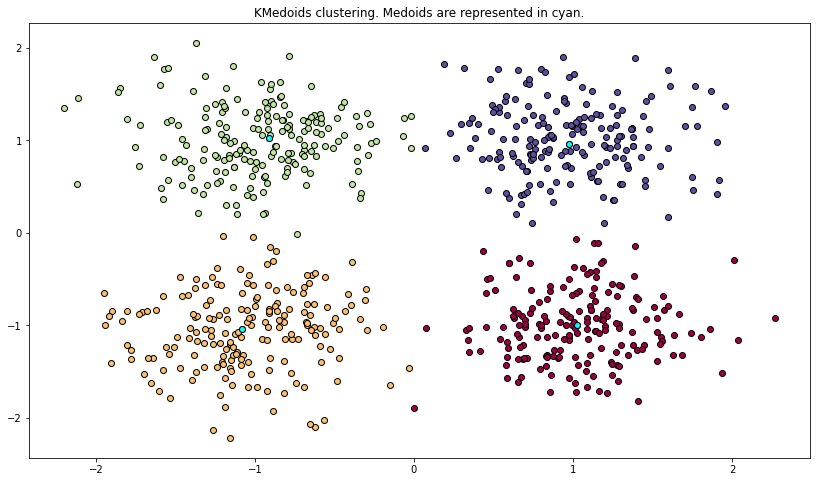

In [23]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn_extra.cluster import KMedoids
from sklearn.datasets import make_blobs

# Generate Sample Data
centers = [[1, 1], [-1, -1], [1, -1], [-1, 1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

# Compute Kmedoids clustering
cobj = KMedoids(n_clusters=4).fit(X)
labels = cobj.labels_
plt.figure(figsize=(14, 8))
unique_labels = set(labels)
colors = [
    plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
]
for k, col in zip(unique_labels, colors):

    class_member_mask = labels == k

    xy = X[class_member_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.plot(
    cobj.cluster_centers_[:, 0],
    cobj.cluster_centers_[:, 1],
    "o",
    markerfacecolor="cyan",
    markeredgecolor="k",
    markersize=6,
)

plt.title("KMedoids clustering. Medoids are represented in cyan.")